# Time Series Sampling

## Introduction

Open Data API (abbreviated to `odapi`) provides convenient interfaces such as the `TimeSerieAPI` interface to make time series management easier to the end user. 

Those interfaces are derived to create connectors such as the `Irceline` connector. As a first example, we will download a trial dataset from the [Irceline][1] [API][2] using the eponymous connector. Dataset created will be used in subequent notebooks to show time series capabilities of the package.

[1]: https://www.irceline.be/en
[2]: https://github.com/irceline/open_data

### Import package

All we need is to import the `Irceline` connector form the `odapi` package:

In [1]:
from odapi.connectors import Irceline

Additionally, we may silence logs as `odapi` package is bit verbose:

In [2]:
from odapi.settings import settings
settings.logger.setLevel(40)

### Create connector

Create a instance of `Irceline` connector to control the Irceline underlying API:

In [3]:
client = Irceline()

Now, we are ready to use the Open Data API.

## Create Dataset

Now we will create a typical Air Quality Dataset to feed subsequent examples. We will sample Air Quality Data of Brussels City (Central Europe) for the 2014 civil year.

### Metadata

All interfaces from `odapi` exposes metadata. We fetch the metadata from the Irceline API to se what it holds. Because we are dealing with air quality time series, metadata will looks like measurment channels. We sample 10 channels at random and show the 8 first columns:

In [4]:
meta = client.meta
meta.sample(10).iloc[:,:8]

,serieid,siteid,measureid,serieunits,measurekey,measurename,sitekey,sitename
335,10873,1710,6002,µg/m³,PM-1.0,Particulate Matter < 1 µm,42R834,Boom
455,6158,1034,6001,µg/m³,PM-2.5,Particulate Matter < 2.5 µm,40AL05,Beveren
427,100011,1710,6001,µg/m³,PM-2.5,Particulate Matter < 2.5 µm,42R834,Boom
407,7034,1198,5,µg/m³,PM-10.0,Particulate Matter < 10 µm,44M705,Roeselare
585,10962,1142,62101,°C,T,Temperature,42N054,Walshoutem
601,10979,1723,62101,°C,T,Temperature,42R804,Antwerpen (Ring)
421,100001,1044,6001,µg/m³,PM-2.5,Particulate Matter < 2.5 µm,40GK06,Genk
356,10762,1723,5,µg/m³,PM-10.0,Particulate Matter < 10 µm,42R804,Antwerpen (Ring)
352,10691,1719,5,µg/m³,PM-10.0,Particulate Matter < 10 µm,40SA04,Hoevenen
140,6817,1157,8,µg/m³,NO2,Nitrogen dioxide,42R822,Antwerpen


The complete list of available metadata is:

In [5]:
meta.dtypes

serieid                      object
siteid                        int64
measureid                    object
serieunits                   object
measurekey                   object
measurename                  object
sitekey                      object
sitename                     object
seriekey                     object
molarmass                   float64
factor                      float64
sitelocation                 object
sitetype                     object
lat                         float64
lon                         float64
nuts1id                      object
nuts2id                      object
nuts3id                      object
nuts1name                    object
nuts2name                    object
nuts3name                    object
lauid                        object
launame                      object
started         datetime64[ns, UTC]
stopped         datetime64[ns, UTC]
dtype: object

The main columns we are concerned about are:

In [6]:
keys = ['serieid', 'seriekey', 'measurekey', 'sitekey', 'measurename', 'sitename']

In [7]:
client.meta.measurekey.unique()

array(['1,2-XYLENE O-XYLENE', 'Ammonia', 'p', 'BZN', 'BC', 'CO2', 'CO',
       'Hg', 'EBZ', 'MPX', 'NO2', 'NO', 'O3', 'PM-1.0', 'PM-10.0',
       'PM-2.5', 'Relative Humidity', 'SO2', 'T', 'TOL', 'WD', 'WS'],
      dtype=object)

#### Selection 

From this, we can make a precise selection of measurement channels using the `select` method (`sitekey` starting by `41` are located in Brussels):

In [8]:
sel = client.select(sitekey='41....',
                    measurekey=['NO', 'O3', 'CO', 'SO2',
                                'PM-', 'BC', 'RH', 'T$', 'W', 'p'])[keys]
sel

,serieid,seriekey,measurekey,sitekey,measurename,sitename
30,11009,p/41R001 (hPa),p,41R001,Atmospheric Pressure,Molenbeek-Saint-Jean
48,10607,BC/41R012 (µg/m³),BC,41R012,Black Carbon,Uccle
51,10693,BC/41N043 (µg/m³),BC,41N043,Black Carbon,Haren
63,6569,BC/41R001 (µg/m³),BC,41R001,Black Carbon,Molenbeek-Saint-Jean
64,6609,BC/41R002 (µg/m³),BC,41R002,Black Carbon,Ixelles
...,...,...,...,...,...,...
617,99941,T/41R012 (°C),T,41R012,Temperature,Uccle
623,99915,WD/41R001 (°G),WD,41R001,Wind Direction,Molenbeek-Saint-Jean
624,99939,WD/41R012 (°G),WD,41R012,Wind Direction,Uccle
629,99916,WS/41R001 (m/s),WS,41R001,Wind Speed (scalar),Molenbeek-Saint-Jean


In [9]:
sel

,serieid,seriekey,measurekey,sitekey,measurename,sitename
30,11009,p/41R001 (hPa),p,41R001,Atmospheric Pressure,Molenbeek-Saint-Jean
48,10607,BC/41R012 (µg/m³),BC,41R012,Black Carbon,Uccle
51,10693,BC/41N043 (µg/m³),BC,41N043,Black Carbon,Haren
63,6569,BC/41R001 (µg/m³),BC,41R001,Black Carbon,Molenbeek-Saint-Jean
64,6609,BC/41R002 (µg/m³),BC,41R002,Black Carbon,Ixelles
...,...,...,...,...,...,...
617,99941,T/41R012 (°C),T,41R012,Temperature,Uccle
623,99915,WD/41R001 (°G),WD,41R001,Wind Direction,Molenbeek-Saint-Jean
624,99939,WD/41R012 (°G),WD,41R012,Wind Direction,Uccle
629,99916,WS/41R001 (m/s),WS,41R001,Wind Speed (scalar),Molenbeek-Saint-Jean


A complete overview of the selection is (table shows serie identifiers):

In [10]:
sel.pivot_table(index='sitekey', columns='measurekey',
                values='serieid', aggfunc='first')\
   .style.format('{}', na_rep='-')

measurekey,BC,CO,CO2,NO,NO2,O3,PM-10.0,PM-2.5,SO2,T,WD,WS,p
sitekey,,,,,,,,,,,,,
41B001,-,6500,-,6503,6504,-,-,-,6502,-,-,-,-
41B004,-,6506,-,6507,6508,6509,-,-,-,-,-,-,-
41B006,-,6514,-,6515,6516,6517,-,-,-,-,-,-,-
41B008,-,10616,-,10613,10614,-,-,-,10615,-,-,-,-
41B011,-,-,-,6527,6528,6530,6531,6532,-,99914,-,-,-
41CHA1,-,-,-,100035,100036,-,-,-,-,-,-,-,-
41MEU1,-,-,-,6550,6551,10766,6552,6553,6549,-,-,-,-
41N043,10693,6558,-,6560,6561,6562,6563,6564,6559,-,-,-,-
41R001,6569,6571,-,6573,6574,6577,6578,6579,6572,99917,99915,99916,11009


### Records

Using the selection done above, we can fetch records on a defined time range using the `get_records` method:

In [11]:
recs = client.get_records(sel, start='2014-01-01 00:00:00+0100',
                          stop='2015-01-01 00:00:00+0100')

We localize timestamps to the rightful timezone (`odapi` enforces Time Zone to be located in UTC internally):

In [12]:
recs['start'] = recs['start'].dt.tz_convert('CET')

We pivot records to align Time Series and ensure time axis is regular:

In [13]:
data = recs.merge(sel[keys])
data = data.pivot_table(index='start',
                        columns=['seriekey', 'sitekey', 'measurekey', 'serieid'],
                        values='value')
data = data.resample('1H').first()

A selection of final dataframe looks like:

In [14]:
data.filter(regex='NO.*/41R00(1|2)').tail()

seriekey,NO/41R001 (µg/m³),NO/41R002 (µg/m³),NO2/41R001 (µg/m³),NO2/41R002 (µg/m³)
sitekey,41R001,41R002,41R001,41R002
measurekey,NO,NO,NO2,NO2
serieid,6573,6614,6574,6615
start,,,,
2014-12-31 19:00:00+01:00,95.0,55.0,91.0,75.0
2014-12-31 20:00:00+01:00,52.0,52.0,73.0,69.5
2014-12-31 21:00:00+01:00,29.5,33.5,62.0,60.5
2014-12-31 22:00:00+01:00,32.5,34.5,60.5,57.5
2014-12-31 23:00:00+01:00,43.5,30.5,57.5,48.5


And finally, we draw some Time Series:

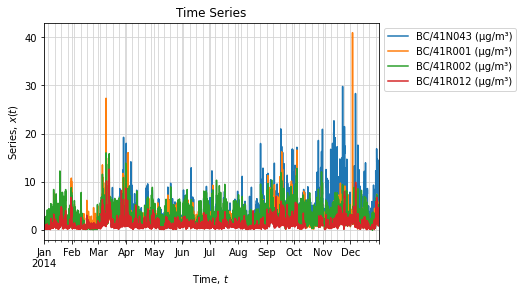

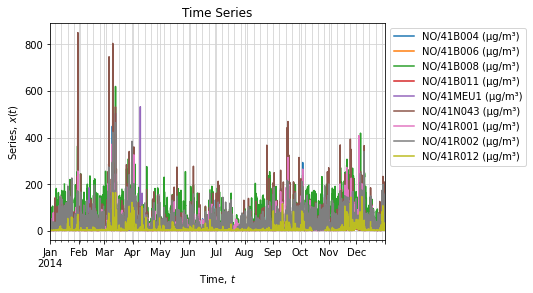

In [15]:
for k in ['BC', 'NO']:#data.columns.levels[2]:
    axe = data.filter(regex='{}/'.format(k)).droplevel([1,2,3], axis=1).plot()
    axe.set_title("Time Series")
    axe.set_xlabel("Time, $t$")
    axe.set_ylabel("Series, $x(t)$")
    lgd = axe.legend(bbox_to_anchor=(1, 1), loc='upper left')
    axe.grid(which='both', color='lightgray')

We store the final dataframe for subseqent examples (see next notebooks):

In [16]:
data.to_pickle("brussels_2014.pickle")